In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.cbook as cbook

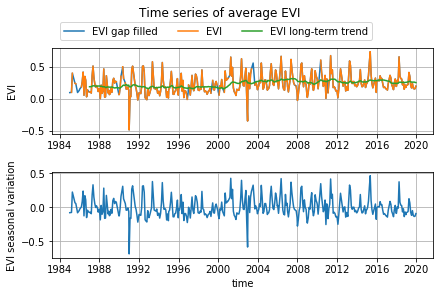

In [3]:
# EVI
csvB = r'evi.csv'
A = pd.read_csv(csvB)
time = pd.to_datetime(A.iloc[:, 0])
#time = A.iloc[:, 0]
evi = A.iloc[:, 1]
eviNoGap = evi.interpolate()
eviMovmean = eviNoGap.rolling(25).mean()
# detrend
eviSeason = signal.detrend(eviNoGap)
fig2, axs = plt.subplots(nrows = 2, ncols = 1, constrained_layout = True)
l0, = axs[0].plot(time, eviNoGap, label = 'EVI gap filled')
l1, = axs[0].plot(time, evi, label = 'EVI')
l2, = axs[0].plot(time, eviMovmean, label = 'EVI long-term trend')
fig2.legend(bbox_to_anchor=(0., 0.95, 1., 0.), loc='upper center',
           ncol=3,  borderaxespad=0.)
axs[0].set(ylabel = 'EVI', title = ' ')
axs[0].grid()
# plt.show()

#fig, ax = plt.subplots()
axs[1].plot(time, eviSeason, label = 'EVI Seasonal Variation')

#fig.legend(bbox_to_anchor=(0., 0.81, 1., 0.), loc='lower center',
#           ncol=2,  borderaxespad=0.)
#
#fig.legend((l1, l2), ('GPP', 'GPP long-term trend'), 'lower left')
axs[1].set(xlabel = 'time', ylabel = 'EVI seasonal variation')
axs[1].grid()
fig2.suptitle('Time series of average EVI')
plt.show()
fig2.savefig('EVI.jpg', dpi = 300)

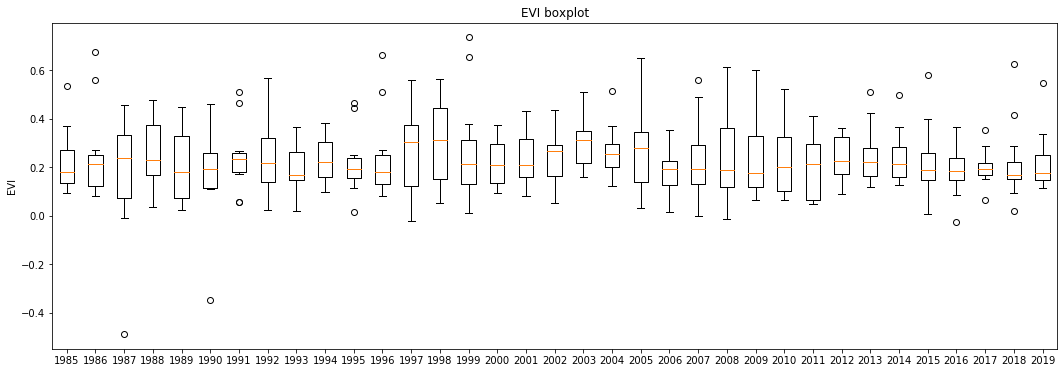

In [2]:
# boxplot

csvB = r'evi.csv'
A = pd.read_csv(csvB)
time = pd.to_datetime(A.iloc[:, 0]).rename("time")
#time = A.iloc[:, 0]
evi = A.iloc[:, 1].rename("evi").interpolate()
year = time.dt.year
index = pd.unique(year)

evi = pd.DataFrame.to_numpy(evi)
input = np.reshape(evi, (12, 35))

stats = cbook.boxplot_stats(input, labels = index)
fig4, ax = plt.subplots(figsize=(18, 6))
ax.set(ylabel = 'EVI', title = 'EVI boxplot')
ax.bxp(stats)
fig4.show()
fig4.savefig('EVI boxplot.jpg', dpi = 300)